Kaggle UFO data filtered for Arizona
Encoding Categorical Variables

In [1]:
#Import our depdencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn as skl
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Arizona UFO data
ufo_data_df = pd.read_csv("ufo_pop_merge.csv")
ufo_data_df.head(5)

,Unnamed: 0,summary,date_time,shape,duration,stats,text,posted,city_latitude,city_longitude,key,date_str,time_str,year,month_x,day_x,City,State,Year,Population
0,0,Fleet of moving stars. ((Starlink satellites?)),2020-04-17T20:00:00,light,1 hour,Occurred : 4/17/2020 20:00 (Entered as : 04/1...,Fleet of moving stars Looked like moving stars...,2020-06-25T00:00:00,33.5178,-112.3667,Litchfield Park2020-04-17T20:00:00,2020-04-17,20:00:00,2020,4,17,Litchfield Park,AZ,2020,6847
1,1,Star-like UFO and strange sound.,2020-05-17T21:00:00,light,3 minutes,Occurred : 5/17/2020 21:00 (Entered as : 05/1...,Star-like UFO and strange sound had just seen ...,2020-06-25T00:00:00,33.5178,-112.3667,Litchfield Park2020-05-17T21:00:00,2020-05-17,21:00:00,2020,5,17,Litchfield Park,AZ,2020,6847
2,2,A cross shaped object illuminated with lights...,2004-07-20T19:45:00,cross,1 minute,Occurred : 7/20/2004 19:45 (Entered as : 07/2...,A cross shaped object illuminated with lights...,2004-09-29T00:00:00,33.5178,-112.3667,Litchfield Park2004-07-20T19:45:00,2004-07-20,19:45:00,2004,7,20,Litchfield Park,AZ,2004,3964
3,3,to dark to see color.,2004-04-20T08:45:00,triangle,8:45-8:47,Occurred : 4/20/2004 08:45 (Entered as : 04/2...,"to dark to see color. I'm 12 years old, i was ...",2004-08-11T00:00:00,33.5178,-112.3667,Litchfield Park2004-04-20T08:45:00,2004-04-20,08:45:00,2004,4,20,Litchfield Park,AZ,2004,3964
4,4,Strange craft with blinking lights in a solid ...,2005-08-19T20:30:00,triangle,3 minutes,Occurred : 8/19/2005 20:30 (Entered as : 08/1...,Strange craft with blinking lights in a solid ...,2005-10-11T00:00:00,33.5178,-112.3667,Litchfield Park2005-08-19T20:30:00,2005-08-19,20:30:00,2005,8,19,Litchfield Park,AZ,2005,4361


In [3]:
# data info
ufo_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3143 non-null   int64  
 1   summary         3143 non-null   object 
 2   date_time       3143 non-null   object 
 3   shape           3143 non-null   object 
 4   duration        3143 non-null   object 
 5   stats           3143 non-null   object 
 6   text            3143 non-null   object 
 7   posted          3143 non-null   object 
 8   city_latitude   3143 non-null   float64
 9   city_longitude  3143 non-null   float64
 10  key             3143 non-null   object 
 11  date_str        3143 non-null   object 
 12  time_str        3143 non-null   object 
 13  year            3143 non-null   int64  
 14  month_x         3143 non-null   int64  
 15  day_x           3143 non-null   int64  
 16  City            3143 non-null   object 
 17  State           3143 non-null   o

In [4]:
# Drop the unknown ID columns, 'unnamed' and 'key'.
ufo_data_df = ufo_data_df.drop(['Unnamed: 0', 'key'],1)
ufo_data_df.head(5)

,summary,date_time,shape,duration,stats,text,posted,city_latitude,city_longitude,date_str,time_str,year,month_x,day_x,City,State,Year,Population
0,Fleet of moving stars. ((Starlink satellites?)),2020-04-17T20:00:00,light,1 hour,Occurred : 4/17/2020 20:00 (Entered as : 04/1...,Fleet of moving stars Looked like moving stars...,2020-06-25T00:00:00,33.5178,-112.3667,2020-04-17,20:00:00,2020,4,17,Litchfield Park,AZ,2020,6847
1,Star-like UFO and strange sound.,2020-05-17T21:00:00,light,3 minutes,Occurred : 5/17/2020 21:00 (Entered as : 05/1...,Star-like UFO and strange sound had just seen ...,2020-06-25T00:00:00,33.5178,-112.3667,2020-05-17,21:00:00,2020,5,17,Litchfield Park,AZ,2020,6847
2,A cross shaped object illuminated with lights...,2004-07-20T19:45:00,cross,1 minute,Occurred : 7/20/2004 19:45 (Entered as : 07/2...,A cross shaped object illuminated with lights...,2004-09-29T00:00:00,33.5178,-112.3667,2004-07-20,19:45:00,2004,7,20,Litchfield Park,AZ,2004,3964
3,to dark to see color.,2004-04-20T08:45:00,triangle,8:45-8:47,Occurred : 4/20/2004 08:45 (Entered as : 04/2...,"to dark to see color. I'm 12 years old, i was ...",2004-08-11T00:00:00,33.5178,-112.3667,2004-04-20,08:45:00,2004,4,20,Litchfield Park,AZ,2004,3964
4,Strange craft with blinking lights in a solid ...,2005-08-19T20:30:00,triangle,3 minutes,Occurred : 8/19/2005 20:30 (Entered as : 08/1...,Strange craft with blinking lights in a solid ...,2005-10-11T00:00:00,33.5178,-112.3667,2005-08-19,20:30:00,2005,8,19,Litchfield Park,AZ,2005,4361


In [5]:
#print(ufo_data_df['shape'].value_counts())
ufo_shape_count = ufo_data_df['shape'].value_counts()
ufo_shape_count

light        893
circle       334
other        243
fireball     237
triangle     221
sphere       197
formation    147
disk         137
oval         129
unknown      125
changing     104
cigar         66
flash         61
rectangle     60
diamond       41
cylinder      37
teardrop      32
egg           31
chevron       21
cone          17
cross         10
Name: shape, dtype: int64

<AxesSubplot:ylabel='Density'>

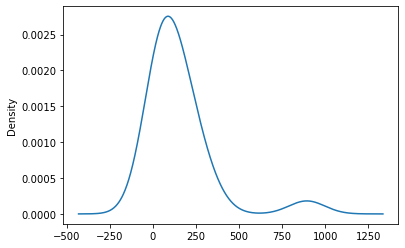

In [6]:
# Visualize the value counts   According to density plot, most unique values have more than 100 instances
ufo_shape_count.plot.density()

In [7]:
# Determine which values to replace
replace_ufo_shape = list(ufo_shape_count[ufo_shape_count < 100].index)
print(replace_ufo_shape)

['cigar', 'flash', 'rectangle', 'diamond', 'cylinder', 'teardrop', 'egg', 'chevron', 'cone', 'cross']


In [8]:
# Replace in Dataframe
for shape in replace_ufo_shape:
  ufo_data_df['shape'] = ufo_data_df['shape'].replace(shape,'other')

In [9]:
ufo_data_df['shape'].head(10)

0       light
1       light
2       other
3    triangle
4    triangle
5       light
6        oval
7       other
8      circle
9      circle
Name: shape, dtype: object

In [10]:
print(ufo_data_df['shape'].value_counts())

light        893
other        619
circle       334
fireball     237
triangle     221
sphere       197
formation    147
disk         137
oval         129
unknown      125
changing     104
Name: shape, dtype: int64


In [11]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ufo_data_df['shape'].values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['shape'])
encode_df.head()

,shape_changing,shape_circle,shape_disk,shape_fireball,shape_formation,shape_light,shape_other,shape_oval,shape_sphere,shape_triangle,shape_unknown
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge the two DataFrames together and drop the shape column
ufo_data_df.merge(encode_df,left_index=True,right_index=True).drop("shape",1)

,summary,date_time,duration,stats,text,posted,city_latitude,city_longitude,date_str,time_str,...,shape_circle,shape_disk,shape_fireball,shape_formation,shape_light,shape_other,shape_oval,shape_sphere,shape_triangle,shape_unknown
0,Fleet of moving stars. ((Starlink satellites?)),2020-04-17T20:00:00,1 hour,Occurred : 4/17/2020 20:00 (Entered as : 04/1...,Fleet of moving stars Looked like moving stars...,2020-06-25T00:00:00,33.5178,-112.3667,2020-04-17,20:00:00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Star-like UFO and strange sound.,2020-05-17T21:00:00,3 minutes,Occurred : 5/17/2020 21:00 (Entered as : 05/1...,Star-like UFO and strange sound had just seen ...,2020-06-25T00:00:00,33.5178,-112.3667,2020-05-17,21:00:00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,A cross shaped object illuminated with lights...,2004-07-20T19:45:00,1 minute,Occurred : 7/20/2004 19:45 (Entered as : 07/2...,A cross shaped object illuminated with lights...,2004-09-29T00:00:00,33.5178,-112.3667,2004-07-20,19:45:00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,to dark to see color.,2004-04-20T08:45:00,8:45-8:47,Occurred : 4/20/2004 08:45 (Entered as : 04/2...,"to dark to see color. I'm 12 years old, i was ...",2004-08-11T00:00:00,33.5178,-112.3667,2004-04-20,08:45:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Strange craft with blinking lights in a solid ...,2005-08-19T20:30:00,3 minutes,Occurred : 8/19/2005 20:30 (Entered as : 08/1...,Strange craft with blinking lights in a solid ...,2005-10-11T00:00:00,33.5178,-112.3667,2005-08-19,20:30:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,The sighting was approximately 4 hours after t...,2021-05-28T02:30:00,1-2 hrs,Occurred : 5/28/2021 02:30 (Entered as : 05/2...,The sighting was approximately 4 hours after t...,2021-07-31T00:00:00,34.3249,-111.5487,2021-05-28,02:30:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3139,Lights over Northeastern AZ,2021-05-08T20:05:00,5 minutes,Occurred : 5/8/2021 20:05 (Entered as : 05/08...,Lights over Northeastern AZ At approx 20:05 on...,2021-05-20T00:00:00,34.5151,-109.6950,2021-05-08,20:05:00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3140,Flashing Red & Green Object over Airport - hov...,2020-02-12T21:30:00,several hours,Occurred : 2/12/2020 21:30 (Entered as : 02/1...,Flashing Red & Green Object over Airport - hov...,2020-02-13T00:00:00,32.5376,-114.7138,2020-02-12,21:30:00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3141,Bright solid white light executes 90 degree tu...,2020-10-06T19:13:00,90 seconds,Occurred : 10/6/2020 19:13 (Entered as : 10/0...,Bright solid white light executes 90 degree tu...,2020-12-23T00:00:00,33.2734,-109.2711,2020-10-06,19:13:00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
